In [ ]:
#任务：基于transfer_data.csv数据，建立mlp模型，再实现模型迁移学习：

#实现x对y的预测，可视化结果
#基于新数据transfer_data2.csv，对前模型进行二次训练，对比模型训练次数少的情况下的表现

#各注：模型结构：mlp，两个隐藏层，每层50个神经元，激活函数relu，输出层激活函数linear，迭代次数：100次

In [ ]:
#upload and check data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#generation train data
x_data = np.linspace(-5, 5, 100)[:, np.newaxis]
noise = np.random.normal(0, 0.1, x_data.shape)
y_data = np.square(x_data) - 5 + noise
y_data = y_data.flatten()
#generation data for transfer learing
x_new = np.linspace(-6, 6, 120)[:, np.newaxis]+[2]
noise = np.random.normal(1, 0.5, x_new.shape)
y_new = np.square(x_new) - 10 + noise
y_new = y_new.flatten()

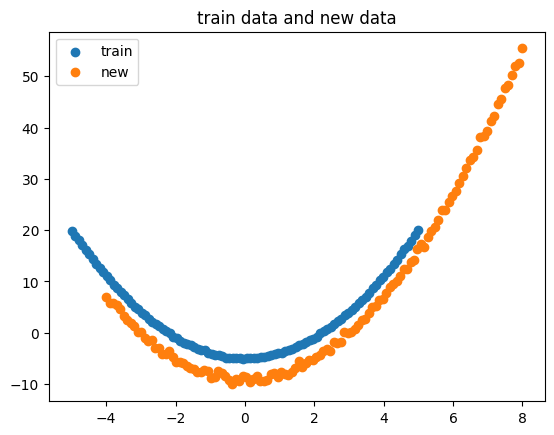

In [ ]:
#visualize train data and new data graph
fig1 = plt.figure()
train = plt.scatter(x_data, y_data)
new = plt.scatter(x_new, y_new)
plt.legend((train, new), ('train', 'new'))
plt.title('train data and new data')
plt.show()

In [ ]:
#make sure data shape
print(x_data.shape)
print(y_data.shape)
print(x_data[:5])
print(y_data[:5])

(100, 1)
(100,)
[[-5.       ]
 [-4.8989899]
 [-4.7979798]
 [-4.6969697]
 [-4.5959596]]
[19.85106933 18.88326099 18.12872589 17.06116881 16.03234484]


In [ ]:
#setup model
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(units=50, input_dim=1, activation='relu'))
model.add(Dense(units=50, activation='relu'))
model.add(Dense(units=1, activation='linear'))
model.compile(loss='mse', optimizer='adam')
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 50)             │           100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,701 (10.55 KB)

 Trainable params: 2,701 (10.55 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#train model
model.fit(x_data, y_data, epochs=200, batch_size=32)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0471
Epoch 160/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0399
Epoch 161/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0635
Epoch 162/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0912
Epoch 163/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0532
Epoch 164/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0533
Epoch 165/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0598
Epoch 166/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0429
Epoch 167/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0426
Epoch 168/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0422 
Epoch 169/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0450
Epoch 170/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0405
Epoch 171/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0459
Epoch 172/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0369
Epoch 173/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0395
Epoch 17

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


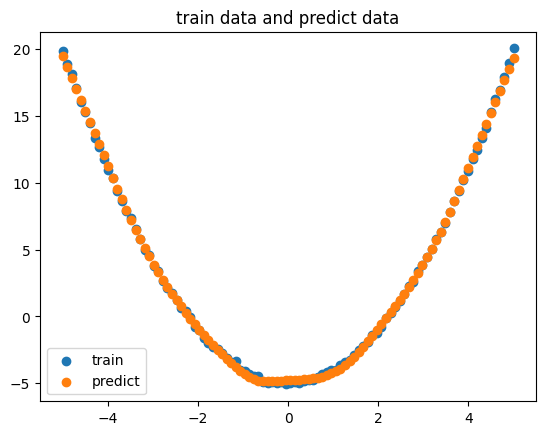

0.9993989654375629
200 epoch got a good predict


In [ ]:
#make predict and visualize
import sklearn.metrics as metrics
y_pred = model.predict(x_data)
fig2 = plt.figure()
train = plt.scatter(x_data, y_data)
predict = plt.scatter(x_data, y_pred)
plt.legend((train, predict), ('train', 'predict'))
plt.title('train data and predict data')
plt.show()
print(metrics.r2_score(y_data, y_pred))
print('200 epoch got a good predict')

In [ ]:
#store model in loacl
import joblib
joblib.dump(model, 'model1.m')

['model1.m']

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


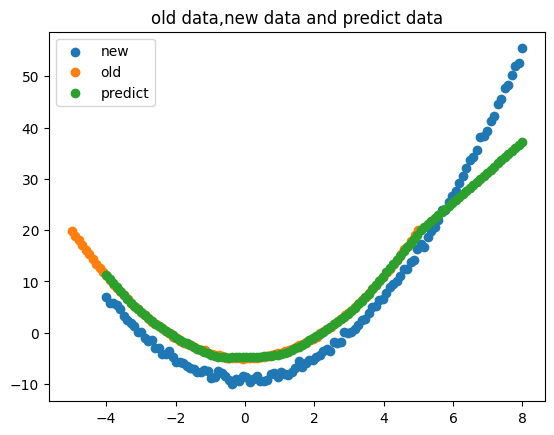

predict data more like old data not like new data


In [ ]:
#load model and virsulize
#use model test new data
model2 = joblib.load('model1.m')
predict2 = model2.predict(x_new)
fig3 = plt.figure()
new = plt.scatter(x_new, y_new)
old = plt.scatter(x_data, y_data)
predict = plt.scatter(x_new, predict2)
plt.legend((new, old, predict), ('new', 'old', 'predict'))
plt.title('old data,new data and predict data')
plt.show()
print('predict data more like old data not like new data')

In [ ]:
#transfer learing(use new data train model)
model2.fit(x_new, y_new, epochs=10, batch_size=32)

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.7336 
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.7183
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.7180
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.6161
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.5961 
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.5837
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.6503
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.5361
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.5341 
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.5624


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


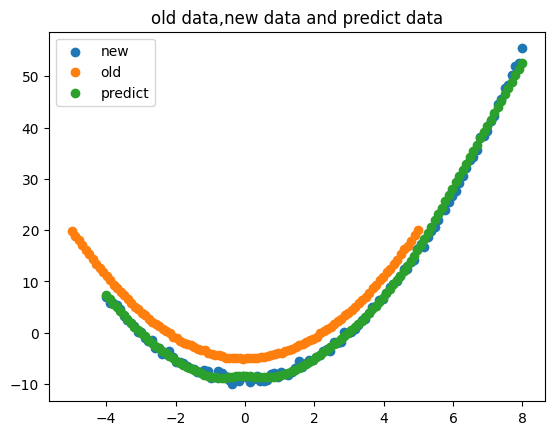

In [ ]:
# predict and make graph
predict2 = model2.predict(x_new)
fig4 = plt.figure()
new = plt.scatter(x_new, y_new)
old = plt.scatter(x_data, y_data)
predict = plt.scatter(x_new, predict2)
plt.legend((new, old, predict), ('new', 'old', 'predict'))
plt.title('old data,new data and predict data')
plt.show()
print('After second train, predict data more like new data')